#### <i> Energy Demand Forecasting Using Machine Learning Optimizing Smart Grid Efficiency with Time Series Analytics 25802 </i>
#### <i> Import Library files </i>

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")



#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("3098000032-Mar18-Mar19.csv")
df

,serial,kWh,kW,kVARh,kVAR,Time_stamp
0,3098000032,10.854,0.000,7.814,0.002,2018-03-01 15:30:00
1,3098000032,10.750,0.000,7.813,0.000,2018-03-01 14:30:00
2,3098000032,12.325,0.086,8.302,0.076,2018-03-05 09:00:00
3,3098000032,12.372,0.094,8.345,0.086,2018-03-05 09:30:00
4,3098000032,12.415,0.086,8.386,0.082,2018-03-05 10:00:00
...,...,...,...,...,...,...
17457,3098000032,6781.400,0.982,1721.240,0.406,2019-03-31 22:00:00
17458,3098000032,6781.920,1.040,1721.320,0.460,2019-03-31 22:30:00
17459,3098000032,6782.520,1.192,1721.390,0.498,2019-03-31 23:00:00
17460,3098000032,6783.120,0.000,1721.470,0.436,2019-03-31 23:30:00


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17462 entries, 0 to 17461
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   serial      17462 non-null  int64  
 1   kWh         17462 non-null  float64
 2   kW          17462 non-null  float64
 3   kVARh       17462 non-null  float64
 4   kVAR        17462 non-null  float64
 5   Time_stamp  17462 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 818.7+ KB


In [4]:
df.describe()

,serial,kWh,kW,kVARh,kVAR
count,1.746200e+04,17462.000000,17462.000000,17462.000000,17462.000000
mean,3.098000e+09,2747.256710,0.750874,1006.527078,0.257706
std,0.000000e+00,1704.039572,1.097139,543.763389,0.247171
min,3.098000e+09,10.750000,0.000000,7.813000,0.000000
25%,3.098000e+09,1358.445000,0.100000,552.427750,0.080000
50%,3.098000e+09,2981.975000,0.212000,1160.990000,0.190000
75%,3.098000e+09,3670.370000,0.834000,1486.230000,0.366000
max,3.098000e+09,6783.840000,6.520000,1721.550000,1.532000


#### <i> Data Preprocessing </i>

In [5]:
# 1. Convert Time_stamp to datetime
df['Time_stamp'] = pd.to_datetime(df['Time_stamp'])

# 2. Sort by Time_stamp
df.sort_values('Time_stamp', inplace=True)

# 3. Set Time_stamp as the index
df.set_index('Time_stamp', inplace=True)

# 4. Check for missing values
missing_summary = df.isnull().sum()

# 5. Drop or fill missing values if any (you can choose method based on EDA)
df.fillna(method='ffill', inplace=True)

# 6. Resample data to hourly (or daily, weekly) if needed
# Example: Resample to hourly mean
df_hourly = df.resample('H').mean()

# 7. Feature Engineering
df_hourly['hour'] = df_hourly.index.hour
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month
df_hourly['is_weekend'] = df_hourly['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# 8. Create lag features (example: 1-hour and 24-hour lag)
df_hourly['kWh_lag_1'] = df_hourly['kWh'].shift(1)
df_hourly['kWh_lag_24'] = df_hourly['kWh'].shift(24)

# 9. Create rolling mean (moving average)
df_hourly['kWh_roll_6'] = df_hourly['kWh'].rolling(window=6).mean()
df_hourly['kWh_roll_24'] = df_hourly['kWh'].rolling(window=24).mean()

# 10. Drop rows with NaNs from lag/rolling calculations
df_hourly.dropna(inplace=True)

# 11. Reset index for visualization if needed
df_hourly_reset = df_hourly.reset_index()

# Show the first few rows of the processed data
print(df_hourly_reset.head())

           Time_stamp        serial      kWh     kW    kVARh   kVAR  hour  \
0 2018-03-06 09:00:00  3.098000e+09  17.8490  0.077  10.5875  0.079     9   
1 2018-03-06 10:00:00  3.098000e+09  17.9530  0.131  10.6645  0.075    10   
2 2018-03-06 11:00:00  3.098000e+09  18.2210  0.301  10.7275  0.063    11   
3 2018-03-06 12:00:00  3.098000e+09  18.6195  0.421  10.8235  0.103    12   
4 2018-03-06 13:00:00  3.098000e+09  19.0075  0.394  10.9095  0.086    13   

   dayofweek  month  is_weekend  kWh_lag_1  kWh_lag_24  kWh_roll_6  \
0          1      3           0    17.7705     12.3485   17.619667   
1          1      3           0    17.8490     12.4375   17.717083   
2          1      3           0    17.9530     12.6280   17.841333   
3          1      3           0    18.2210     12.9860   18.015083   
4          1      3           0    18.6195     13.4075   18.236750   

   kWh_roll_24  
0    15.911771  
1    16.141583  
2    16.374625  
3    16.609354  
4    16.842688  


#### <i> Data Visulization And Analysis </i>

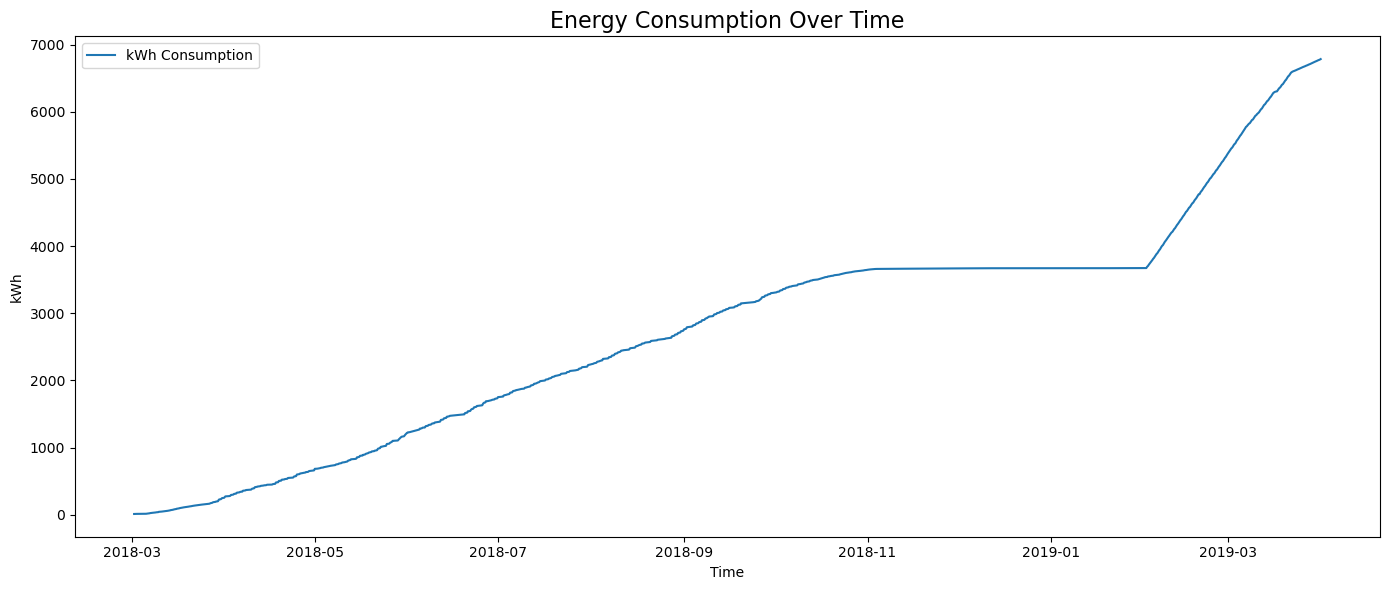

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend Over Time
# -------------------------------
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['kWh'], label='kWh Consumption', color='tab:blue')
plt.title("Energy Consumption Over Time", fontsize=16)
plt.xlabel("Time")
plt.ylabel("kWh")
plt.legend()
plt.tight_layout()
plt.show()

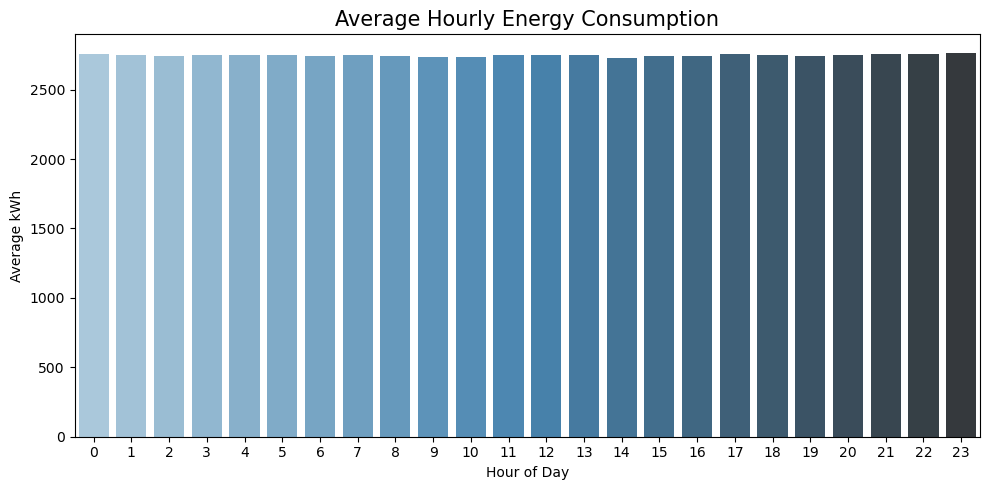

In [7]:
# Daily Usage Pattern (Average kWh by Hour)
# -------------------------------
plt.figure(figsize=(10, 5))
hourly_avg = df.groupby(df.index.hour)['kWh'].mean()
sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette='Blues_d')
plt.title("Average Hourly Energy Consumption", fontsize=15)
plt.xlabel("Hour of Day")
plt.ylabel("Average kWh")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

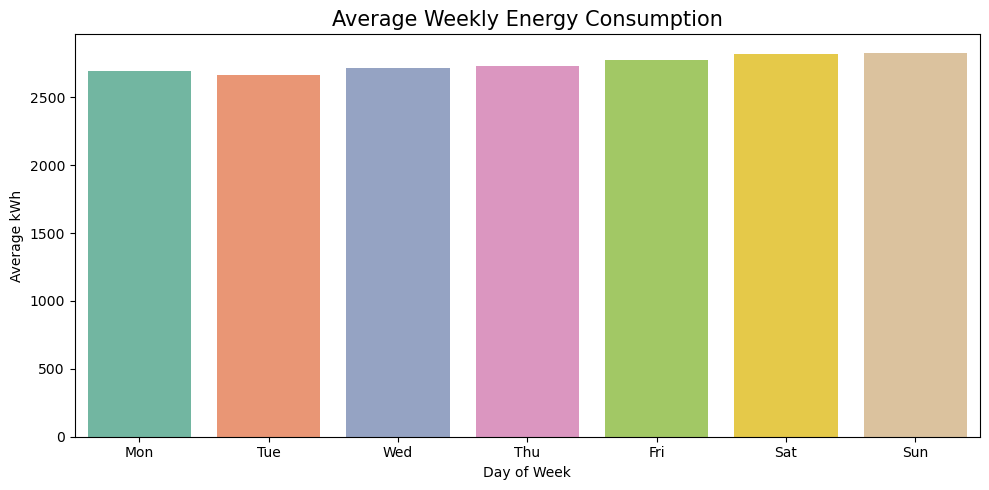

In [8]:
#  Weekly Usage Pattern (Average kWh by Day)
# -------------------------------
plt.figure(figsize=(10, 5))
weekly_avg = df.groupby(df.index.dayofweek)['kWh'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.barplot(x=days, y=weekly_avg.values, palette='Set2')
plt.title("Average Weekly Energy Consumption", fontsize=15)
plt.xlabel("Day of Week")
plt.ylabel("Average kWh")
plt.tight_layout()
plt.show()

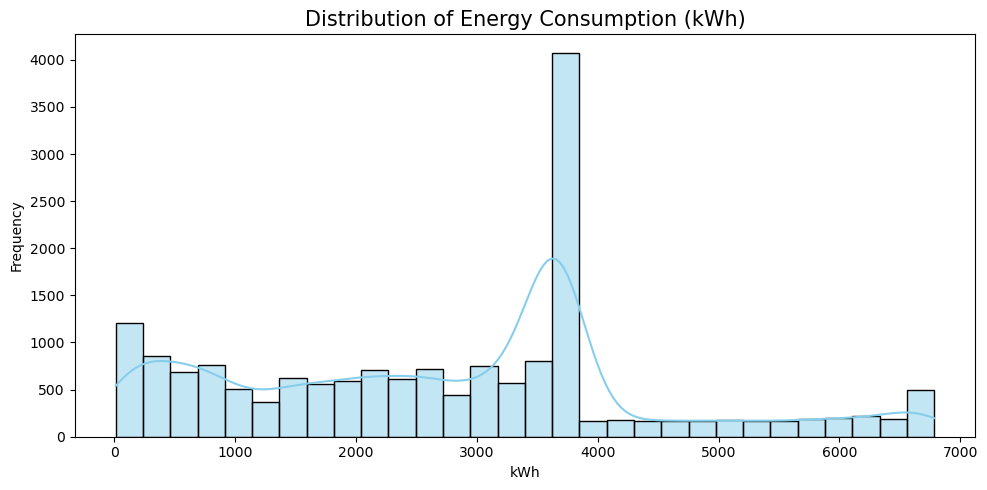

In [9]:
#  Distribution of kWh Consumption
# -------------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['kWh'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Energy Consumption (kWh)", fontsize=15)
plt.xlabel("kWh")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

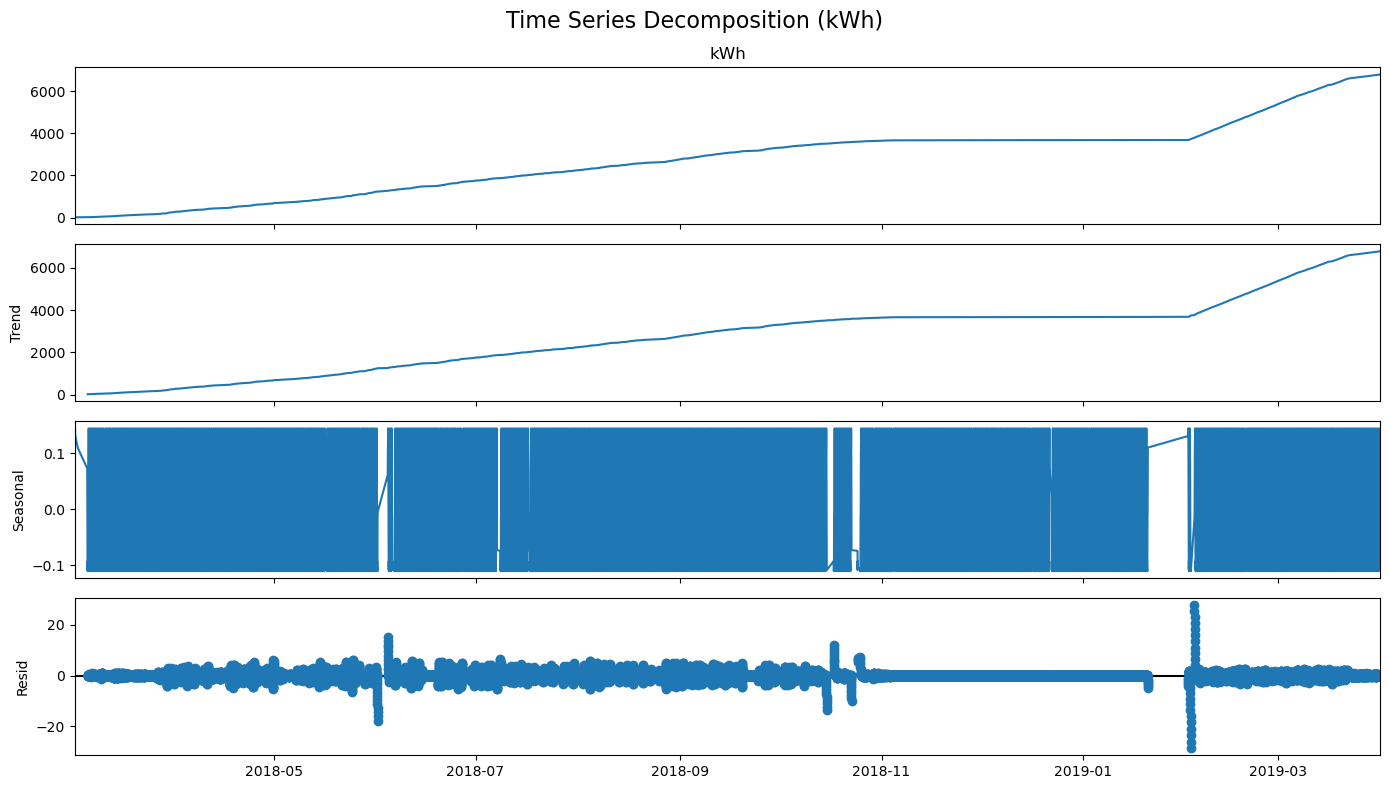

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Time Series Decomposition (Additive Model)
decomposition = seasonal_decompose(df['kWh'], model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
fig.suptitle("Time Series Decomposition (kWh)", fontsize=16)
plt.tight_layout()
plt.show()

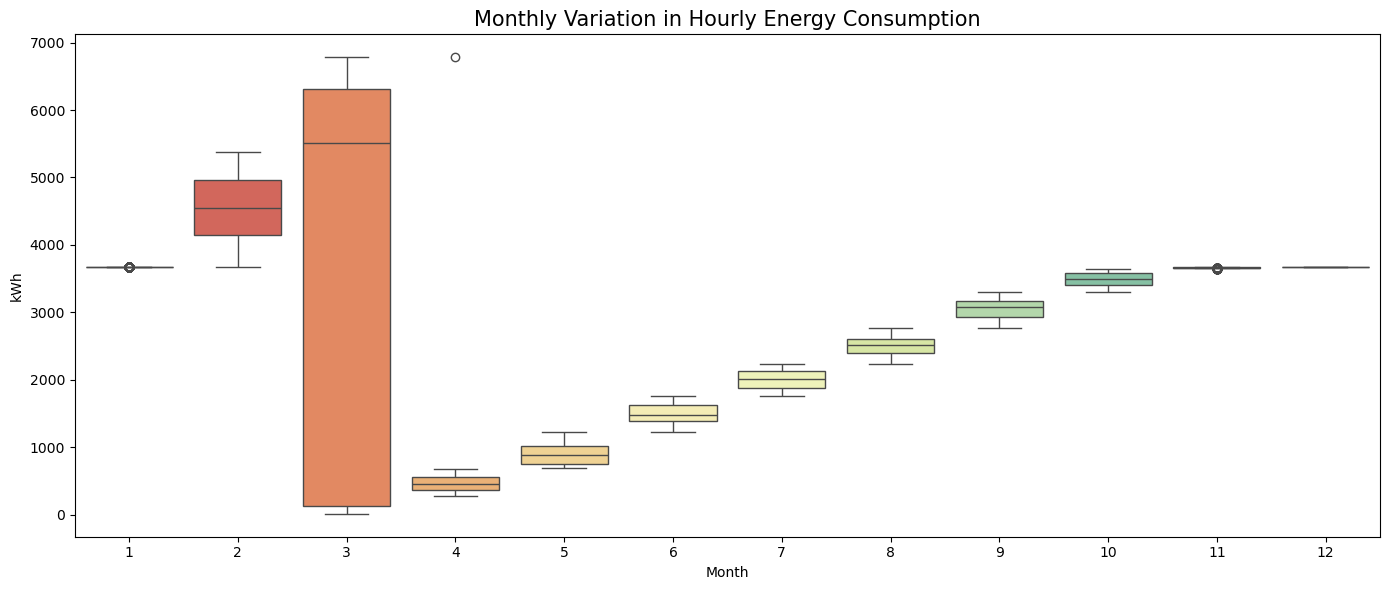

In [11]:
# 3. Seasonal Boxplot: Hourly Energy Usage by Month
df['month'] = df.index.month
df['hour'] = df.index.hour
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='kWh', data=df, palette='Spectral')
plt.title("Monthly Variation in Hourly Energy Consumption", fontsize=15)
plt.xlabel("Month")
plt.ylabel("kWh")
plt.tight_layout()
plt.show()

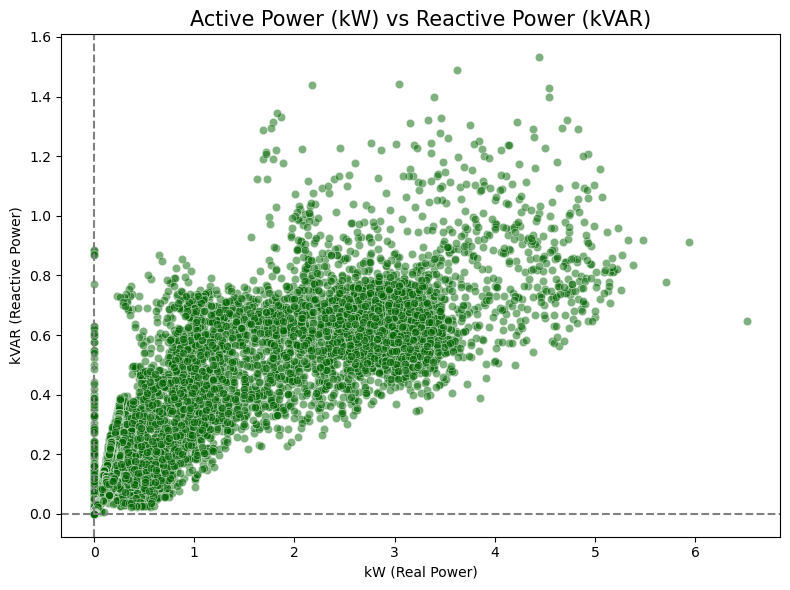

In [12]:
# 5. Power Factor Plot: kW vs kVAR (Quadrature Relationship)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kW', y='kVAR', data=df, alpha=0.5, color='darkgreen')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title("Active Power (kW) vs Reactive Power (kVAR)", fontsize=15)
plt.xlabel("kW (Real Power)")
plt.ylabel("kVAR (Reactive Power)")
plt.tight_layout()
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17462 entries, 2018-03-01 14:30:00 to 2019-04-01 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   serial  17462 non-null  int64  
 1   kWh     17462 non-null  float64
 2   kW      17462 non-null  float64
 3   kVARh   17462 non-null  float64
 4   kVAR    17462 non-null  float64
 5   month   17462 non-null  int32  
 6   hour    17462 non-null  int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 955.0 KB


In [14]:
import pandas as pd


# Define classes based on quantiles
df['Demand_Class'] = pd.qcut(df['kWh'], q=3, labels=['Low', 'Medium', 'High'])

# Optional: convert to numeric labels if needed
df['Demand_Class'] = df['Demand_Class'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['kW', 'kVARh', 'kVAR', 'month', 'hour']]
y = df['Demand_Class']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### <i> Modeling </i>
#### <i> Logistic Regression </i>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

log_model = LogisticRegression(multi_class='ovr', max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("📘 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



📘 Logistic Regression
Accuracy: 0.9051763628034815
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1456
           1       0.86      0.85      0.86      1455
           2       0.89      0.87      0.88      1455

    accuracy                           0.91      4366
   macro avg       0.90      0.91      0.90      4366
weighted avg       0.90      0.91      0.90      4366



#### <i> KNeighbors Classifier </i>

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

print("📍 K-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


📍 K-Nearest Neighbors
Accuracy: 0.9862574438845625
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1456
           1       0.98      0.98      0.98      1455
           2       0.99      1.00      0.99      1455

    accuracy                           0.99      4366
   macro avg       0.99      0.99      0.99      4366
weighted avg       0.99      0.99      0.99      4366



#### <i> SVM </i>

In [18]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

print("⚙️ Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


⚙️ Support Vector Machine
Accuracy: 0.961749885478699
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1456
           1       0.98      0.90      0.94      1455
           2       0.91      1.00      0.95      1455

    accuracy                           0.96      4366
   macro avg       0.96      0.96      0.96      4366
weighted avg       0.96      0.96      0.96      4366



#### <i> Compare All Models </i>

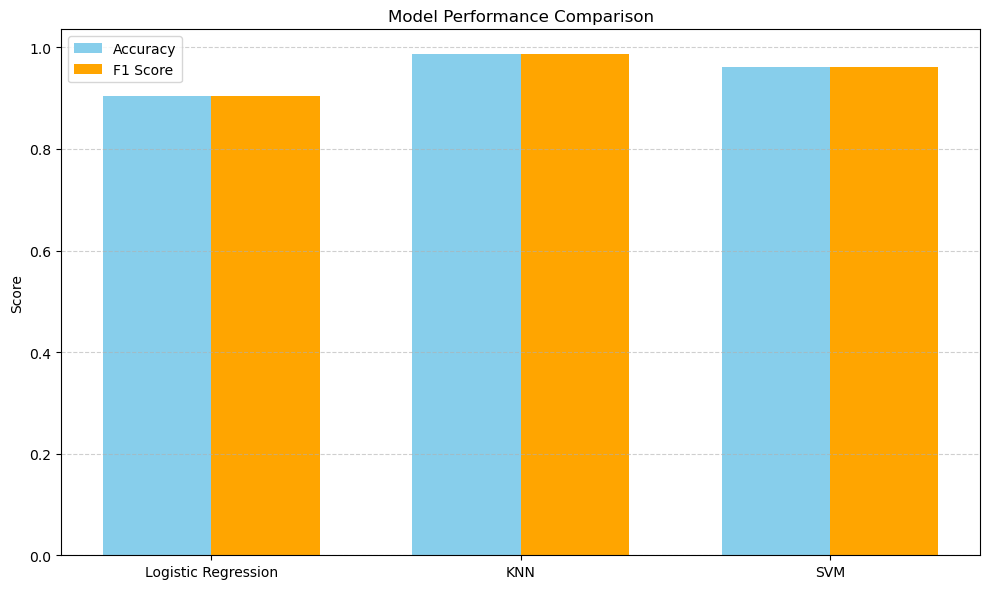

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Define model names
models = ['Logistic Regression', 'KNN', 'SVM']

# Calculate metrics
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

f1_scores = [
    f1_score(y_test, y_pred_log, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_svm, average='weighted')
]

# Plotting
x = range(len(models))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x, accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([i + width for i in x], f1_scores, width=width, label='F1 Score', color='orange')

plt.xticks([i + width/2 for i in x], models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
